## Breast Cancer Wisconsin (Original) Dataset

### Data analysis and applying KMeans

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [26]:
data = pd.read_csv('../breast-cancer-wisconsin.data',names=['sample','clump thickness','cell size uniformity',\
                                                           'cell shape uniformity','marginal adhesion','epithelial cell size',\
                                                           'bare nuclei','bland chromatin','normal nucleoli','mitosis','class'])
data.head()

,sample,clump thickness,cell size uniformity,cell shape uniformity,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [27]:
data.describe()

,sample,clump thickness,cell size uniformity,cell shape uniformity,marginal adhesion,epithelial cell size,bland chromatin,normal nucleoli,mitosis,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [28]:
data['bare nuclei'] = pd.to_numeric(data['bare nuclei'],errors='coerce')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample                   699 non-null int64
clump thickness          699 non-null int64
cell size uniformity     699 non-null int64
cell shape uniformity    699 non-null int64
marginal adhesion        699 non-null int64
epithelial cell size     699 non-null int64
bare nuclei              683 non-null float64
bland chromatin          699 non-null int64
normal nucleoli          699 non-null int64
mitosis                  699 non-null int64
class                    699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [30]:
data['type'] = data['class'].map({2:'benign',4:'malignant'})

In [31]:
y = data['class'].copy()
X = data.drop(labels=['class'],axis=1)
print X.shape,y.shape

(699, 11) (699,)


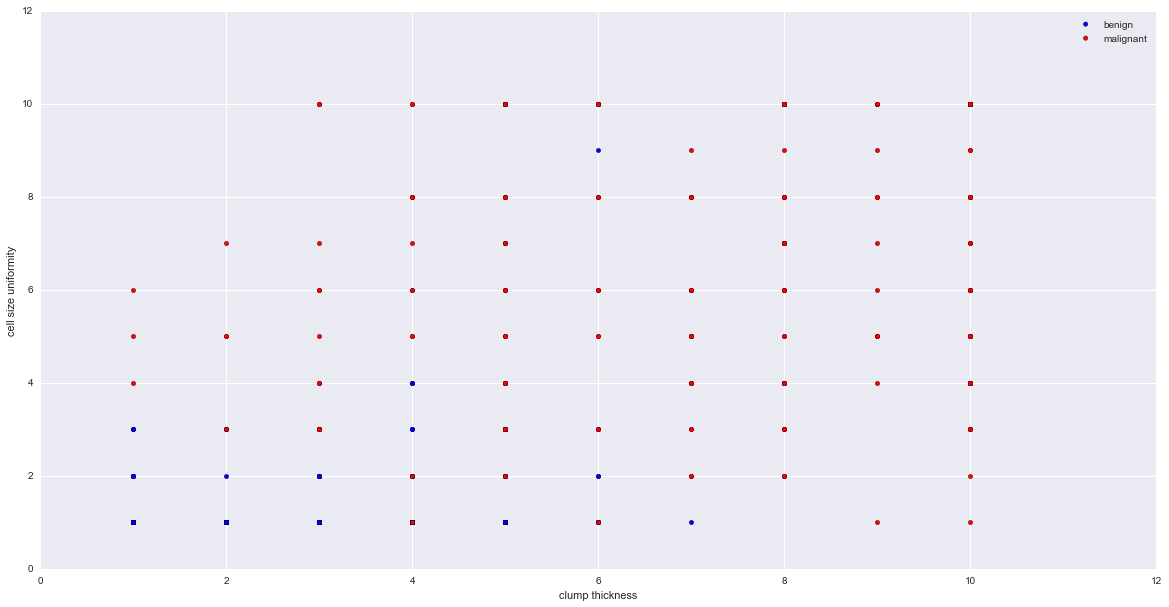

In [32]:
ax = X[X['type'] == 'benign'].plot(kind = 'scatter',x = 'clump thickness',y = 'cell size uniformity',c = 'blue',label='benign')
X[X['type'] == 'malignant'].plot(kind = 'scatter',x = 'clump thickness',y = 'cell size uniformity',c = 'red',label='malignant',ax=ax)

The above graphical representation doesn't specify anything about how cell size uniformity and clump thickness plays a role in defining a cancer to be benign or malignant. Thus we consider all the features into play and use KMeans Algorithm for clustering

In [33]:
X['bare nuclei'] = X['bare nuclei'].fillna(method='ffill')

In [34]:
from sklearn.cluster import KMeans

In [35]:
model = KMeans(n_clusters=2)

In [36]:
X.drop(labels=['sample','type'],inplace=True,axis=1)

In [37]:
model.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [38]:
X['label'] = pd.Series(model.labels_)

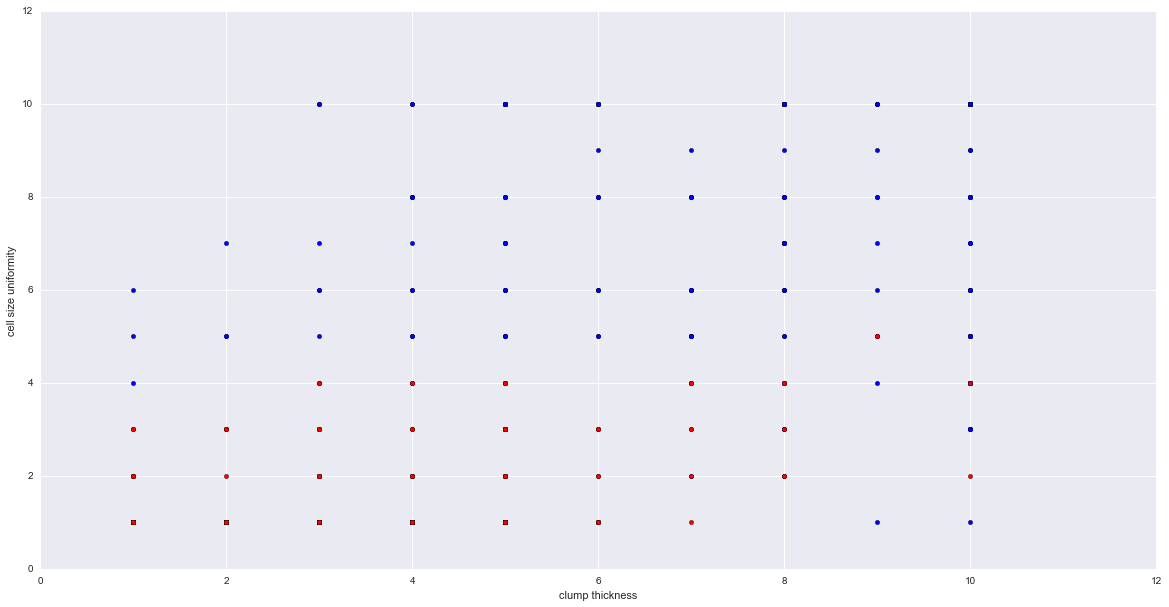

In [39]:
ax = X[X['label'] == 1].plot(kind='scatter',x='clump thickness',y='cell size uniformity',c='blue')
X[X['label'] == 0].plot(kind='scatter',x='clump thickness',y='cell size uniformity',c='red',ax=ax)

The above plot matches closely with the plot produced with the actual labels in hand. But it doesnot give us any information as to which class is denoted by 0 or 1. Either it is malignant or benign. Comparing it with the samples and their corresponding labels we infer that 1 depicts benign and 0 depicts malignant

### Applying K Nearest Neighbors

In [40]:
X.head()

,clump thickness,cell size uniformity,cell shape uniformity,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,label
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,1
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,1
4,4,1,1,3,2,1.0,3,1,1,0


In [41]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [42]:
from sklearn.cross_validation import train_test_split

In [43]:
X = X.drop(labels=['label'],axis=1)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(489, 9) (489,)
(210, 9) (210,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
for i in range(7,20):
    model = KNeighborsClassifier(n_neighbors=i,weights='uniform')
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    print 'CV Accuracy = {}%'.format(score*100)

CV Accuracy = 94.7619047619%
CV Accuracy = 94.7619047619%
CV Accuracy = 94.2857142857%
CV Accuracy = 94.7619047619%
CV Accuracy = 94.7619047619%
CV Accuracy = 94.2857142857%
CV Accuracy = 94.7619047619%
CV Accuracy = 94.2857142857%
CV Accuracy = 94.7619047619%
CV Accuracy = 94.2857142857%
CV Accuracy = 94.2857142857%
CV Accuracy = 94.7619047619%
CV Accuracy = 94.7619047619%


Best CV Accuracy is achieved at n_neighbors = 7

### Visualising the data in higher dimensions

In [47]:
X['type'] = y.map({2:'benign',4:'malignant'})

In [48]:
X.head()

,clump thickness,cell size uniformity,cell shape uniformity,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,type
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [49]:
from pandas.tools.plotting import parallel_coordinates

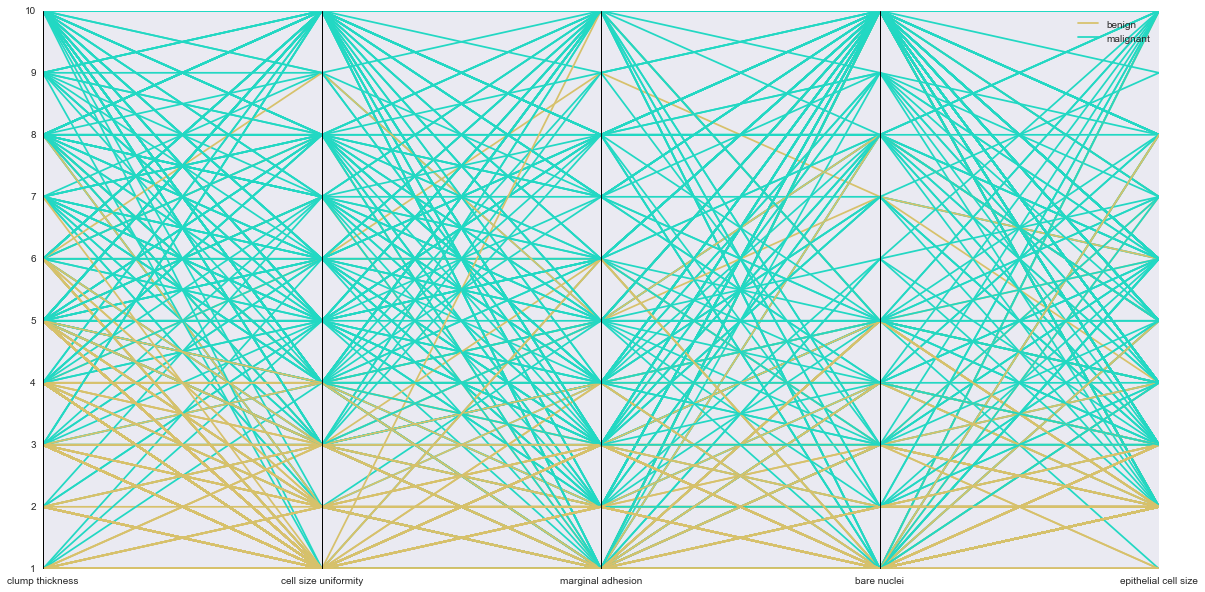

In [50]:
parallel_coordinates(X[['clump thickness','cell size uniformity','marginal adhesion','bare nuclei','epithelial cell size','type']],'type')

All the malignant samples seems to be concentrated in the upper part of the plot leading to the fact that as the parameters increases the chances of the cancer to be malignant increases, although this is not general

#### Checking for outliers using Andrew's Curve

In [51]:
from pandas.tools.plotting import andrews_curves

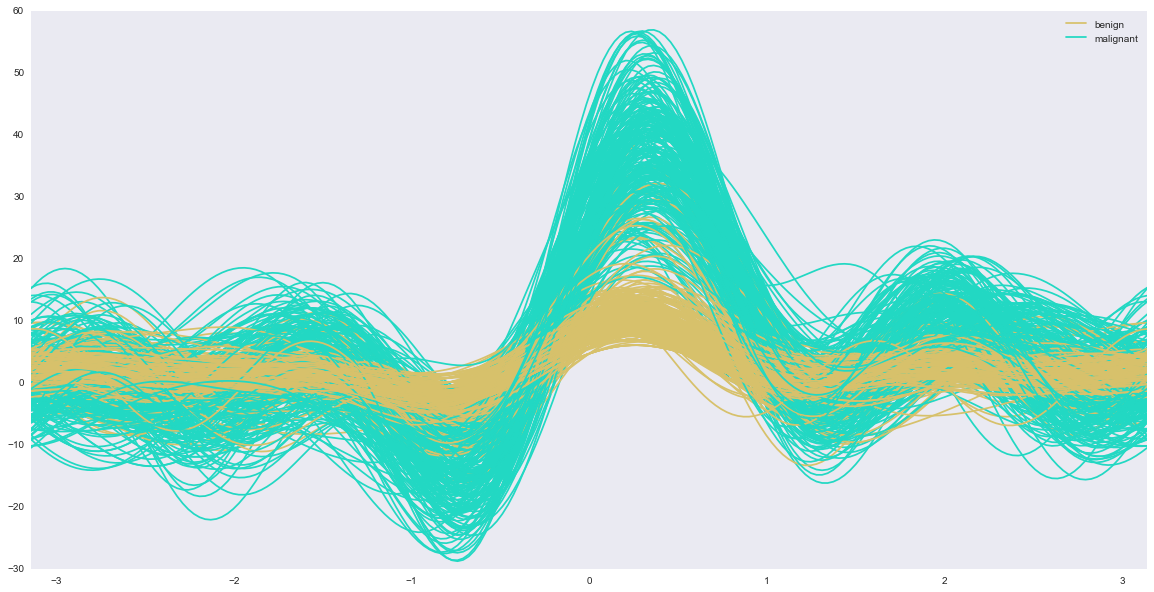

In [52]:
andrews_curves(X,'type')

There are no points that stand out to be classified as outliers. Thus there may exist a smooth relationship between features that contribute towards a cancer being malignant and benign

### Squishing the data to 3 dimensions and visualising it

In [53]:
X.head()

,clump thickness,cell size uniformity,cell shape uniformity,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitosis,type
0,5,1,1,1,2,1.0,3,1,1,benign
1,5,4,4,5,7,10.0,3,2,1,benign
2,3,1,1,1,2,2.0,3,1,1,benign
3,6,8,8,1,3,4.0,3,7,1,benign
4,4,1,1,3,2,1.0,3,1,1,benign


In [54]:
from sklearn.decomposition import PCA

In [55]:
X_benign = X[X['type'] == 'benign'].ix[:,0:-1]
X_malignant = X[X['type'] == 'malignant'].ix[:,0:-1]

In [56]:
pca_b = PCA(n_components=3)
pca_b.fit(X_benign)
pca_m = PCA(n_components=3)
pca_m.fit(X_malignant)

PCA(copy=True, n_components=3, whiten=False)

In [57]:
T_benign = pca_b.transform(X_benign)
print T_benign.shape
print pca_b.explained_variance_ratio_.sum()

(458, 3)
0.706206226117


In [58]:
T_malignant = pca_m.transform(X_malignant)
print T_malignant.shape
print pca_m.explained_variance_ratio_.sum()

(241, 3)
0.60179279155


In [59]:
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


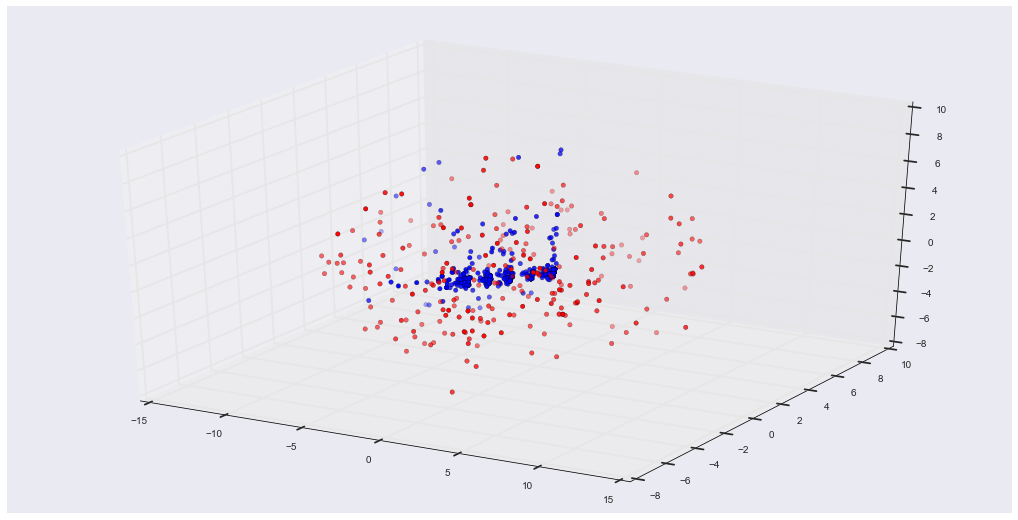

In [60]:
%pylab qt
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(T_benign[:,0],T_benign[:,1],T_benign[:,2],c='b')
ax.scatter(T_malignant[:,0],T_malignant[:,1],T_malignant[:,2],c='r')

The malignant samples seems to be concentrated in a specific region. This shows that it is possible to cluster the samples into malignant and benign. The SVM can be a good choice for the model

### Using SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(kernel='linear',C=1,gamma=0.001)

In [40]:
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(489, 9) (489,)
(210, 9) (210,)


In [41]:
svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
print 'CV Accuracy: {}%'.format(svc.score(X_test,y_test)*100)

CV Accuracy: 95.2380952381%


### Using Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RFC = RandomForestClassifier(n_estimators=11, n_jobs=2)

In [59]:
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=11, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
print 'CV Accuracy: {}%'.format(RFC.score(X_test,y_test)*100)

CV Accuracy: 94.2857142857%


### Using Neural Networks

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using Theano backend.


In [62]:
y_train = y_train.map({4:1,2:0})
y_test = y_test.map({4:1,2:0})

In [71]:
model = Sequential()

In [72]:
model.add(Dense(25,input_dim=9, activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(25, activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(25, activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(25, activation = 'sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(2, activation = 'sigmoid'))

In [73]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_16 (Dense)                   (None, 25)          250         dense_input_4[0][0]              
____________________________________________________________________________________________________
dropout_11 (Dropout)               (None, 25)          0           dense_16[0][0]                   
____________________________________________________________________________________________________
dense_17 (Dense)                   (None, 25)          650         dropout_11[0][0]                 
____________________________________________________________________________________________________
dropout_12 (Dropout)               (None, 25)          0           dense_17[0][0]                   
___________________________________________________________________________________________

In [74]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
model.fit(X_train.values, y_train_hot, batch_size=32, nb_epoch=50, shuffle = True, verbose=0)

In [76]:
test_pred = model.predict_classes(X_test.values)

210/210 [==============================] - 0s     


In [77]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(test_pred, y_test)

0.94761904761904758